In [1]:
%matplotlib inline
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
import cfalcon
CF =cfalcon.CFalcon()

### using   /home/arturo/Documents/Dark-Matter-in-the-Sun/notebooks/input.dm  as inputs


In [2]:
#center = pos_halo[(rho==np.max(rho))][0]
def all_inside(center, r_search):
    try:
        tree = KDTree(np.squeeze(pos3d))
        in_halo = tree.query_radius(center,r_search)[0]
        pos_halo = pos3d[in_halo]
        m_in_halo = mass[in_halo]
    except:
        print "nope"
        sys.exit()
    return pos_halo, m_in_halo

In [3]:
path = "/data/MIB/anunez/NewSchool/Mochima/box_4zoom_mochima_halo3_hydro_SF_LR/output_00041"
center = np.array([7835.1870117, 13770.62597656,12190.21191406])

#path = "/data/MIB/anunez/NewSchool/Mochima/box_4zoom_mochima_halo5_hydro_SF_LR/output_00041/"
#center = np.array([9399.0023295,   13622.76065847,13771.10374521])

uns = CunsIn(path,"stars","all",False)
if uns.isValid()==True:
    print "good"

good


In [4]:
p = wkbl.astro.galaxy_peeker.Info_sniffer(path)
ok=uns.nextFrame("")
ok,mass = uns.getArrayF("all","mass")
print ok
ok,pos = uns.getArrayF("all","pos")
pos = pos * p.simutokpc
mass = mass * p.simutoMsun
print ok

True
True


In [5]:
pos3d = pos.reshape(len(pos)/3, 3)

print center / p.simutokpc

[ 0.31340296  0.55081709  0.48760144]


In [6]:
pos_halo, m_in_halo = all_inside(center, 250.)
pos_halo = pos_halo - center
center = center - center
print "there are ",len(pos_halo)," particles in this region"

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


there are  6720485  particles in this region


In [7]:
## density
pos2 = np.zeros(3*len(pos_halo*3))
pos2[0::3], pos2[1::3], pos2[2::3] = pos_halo[:,0], pos_halo[:,1], pos_halo[:,2]
pos2 = np.array(pos2,dtype=np.float32)
ok,rho,_= CF.getDensity(pos2, m_in_halo)
print ok

True


In [8]:
print np.min(rho),np.max(rho) 

0.0685279 1.07105e+11


In [9]:
rho_min = 1e5
pos_halo = pos_halo[(rho>rho_min)]
rho = rho[(rho>rho_min)]

In [10]:
print center #/ p.simutokpc
nupos = pos_halo[(abs(pos_halo[:,2]-center[2])<1)]
nu_rho = rho[(abs(pos_halo[:,2]-center[2])<1)]

nupos2 = pos_halo[(abs(pos_halo[:,1]-center[1])<1)]
nu_rho2 = rho[(abs(pos_halo[:,1]-center[1])<1)]



[ 0.  0.  0.]


In [1]:
r_search=20.
fig, [ax,ax2] = plt.subplots(1,2,figsize=[16,7])
ax.set_xlim([center[0]-r_search, center[0]+r_search])
ax.set_ylim([center[1]-r_search, center[1]+r_search])
ax2.set_xlim([center[0]-r_search, center[0]+r_search])
ax2.set_ylim([center[2]-r_search, center[2]+r_search])
cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.get_cmap('RdYlBu')
ax.grid(which='both')
ax2.grid(which='both')
ax.set_xlabel("x [kpc]",fontsize=20)
ax2.set_xlabel("x [kpc]",fontsize=20)
ax.set_ylabel("y [kpc]",fontsize=20)
ax2.set_ylabel("z [kpc]",fontsize=20)

ax.scatter(nupos[:,0], nupos[:,1], c=nu_rho, cmap=cm,vmin=1e4, vmax=1e9,lw=0, s=0.4)#, zorder=nu_rho)
coco = ax2.scatter(nupos2[:,0], nupos2[:,2], c=nu_rho2, cmap=cm,vmin=1e5, vmax=1e9,lw=0, s=0.8)
cbar = plt.colorbar(coco)
cbar.set_label(r'$\rho$ [$M_{\odot}$/kpc$^3$]',fontsize=20)
#ax.scatter(pos_halo[:,0],pos_halo[:,1],s=0.01)
#ax.scatter(list_pos[:,0],list_pos[:,1],s=1.1, c='r',lw=0)

NameError: name 'plt' is not defined

In [36]:
#pos_h = pos_halo - center
r_check = np.sqrt(pos_halo[:,0]**2 + pos_halo[:,1]**2 + pos_halo[:,2]**2 )
pos_ring = pos_halo[(r_check<20.)&(r_check>5.)]
P = np.array([[0,0,0],[0,0,0],[0,0,0]])

for i in range(3):
    for j in range(3):
        first = np.average(pos_ring[:,i]*pos_ring[:,j])
        second =(np.average(pos_ring[i])*np.average(pos_ring[j]))
        P[i][j] = first - second 


eigen_values,eigen_vectors = np.linalg.eig(P)
inv = np.linalg.inv(eigen_vectors)
order = np.argsort(abs(eigen_values))

T = np.zeros((3,3))
T[:,0] = eigen_vectors[:,order[0]]
T[:,1] = eigen_vectors[:,order[2]]
T[:,2] = eigen_vectors[:,order[1]]
#T = eigen_vectors

print eigen_vectors
print "\n"
print eigen_values
print "\n\n###########################\n\n"
Tinv = np.linalg.inv(T)
print T 
print "\n\n###########################\n\n"

print np.dot(inv,np.dot(P,eigen_vectors))

print "\n\n###########################\n\n"
print np.dot(Tinv,np.dot(P,T))



print "\n\n###########################\n\n"

print abs(eigen_values)
print eigen_values[order]


[[-0.52605615 -0.81055619  0.25741716]
 [-0.6099057   0.14862376 -0.7784125 ]
 [-0.59268876  0.56648887  0.57254728]]


[-277.2299781    30.36725894   56.86271916]


###########################


[[-0.81055619 -0.52605615  0.25741716]
 [ 0.14862376 -0.6099057  -0.7784125 ]
 [ 0.56648887 -0.59268876  0.57254728]]


###########################


[[ -2.77229978e+02   1.13686838e-13  -1.42108547e-14]
 [ -4.26325641e-14   3.03672589e+01   1.77635684e-14]
 [  2.84217094e-14   2.66453526e-14   5.68627192e+01]]


###########################


[[  3.03672589e+01  -4.26325641e-14   1.77635684e-14]
 [  1.11910481e-13  -2.77229978e+02  -2.13162821e-14]
 [  2.84217094e-14   4.26325641e-14   5.68627192e+01]]


###########################


[ 277.2299781    30.36725894   56.86271916]
[  30.36725894   56.86271916 -277.2299781 ]


In [37]:
Rz= np.array([[0,-1,0],[1,0,0],[0,0,1]])
Rx= np.array([[1.,0.,0.],[0.,0.,-1.],[0.,1.,0.]])
Ry= np.array([[0,0,1],[0,1,0],[-1,0,0]])

T = np.dot(Rx,T)
print Rz
np.dot(P,T[:,0])/-277
np.asarray(np.cross(eigen_vectors[:,1],eigen_vectors[:,0])-eigen_vectors[:,2],dtype=int)

[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  1]]


array([0, 0, 0])

In [38]:
rot = np.zeros((len(pos_halo),3))
#T = to #eigen_vectors
rot[:,0] = T[0][0]*pos_halo[:,0] + T[0][1]*pos_halo[:,1] + T[0][2]*pos_halo[:,2]
rot[:,1] = T[1][0]*pos_halo[:,0] + T[1][1]*pos_halo[:,1] + T[1][2]*pos_halo[:,2]
rot[:,2] = T[2][0]*pos_halo[:,0] + T[2][1]*pos_halo[:,1] + T[2][2]*pos_halo[:,2]


In [39]:
print rot[17564]
print (np.dot(T,pos_halo[17564]))

[ 21.62057733   1.79944179   1.84054481]
[ 21.62057733   1.79944179   1.84054481]


In [40]:
print center #/ p.simutokpc
half_thicknes = .6
nurot = rot[(abs(rot[:,2]-center[2])<half_thicknes)]
nu_rho = rho[(abs(rot[:,2]-center[2])<half_thicknes)]

nurot2 = rot[(abs(rot[:,1]-center[1])<half_thicknes)]
nu_rho2 = rho[(abs(rot[:,1]-center[1])<half_thicknes)]

nurot3 = rot[(abs(rot[:,0]-center[0])<half_thicknes)]
nu_rho3 = rho[(abs(rot[:,0]-center[0])<half_thicknes)]



[ 0.  0.  0.]


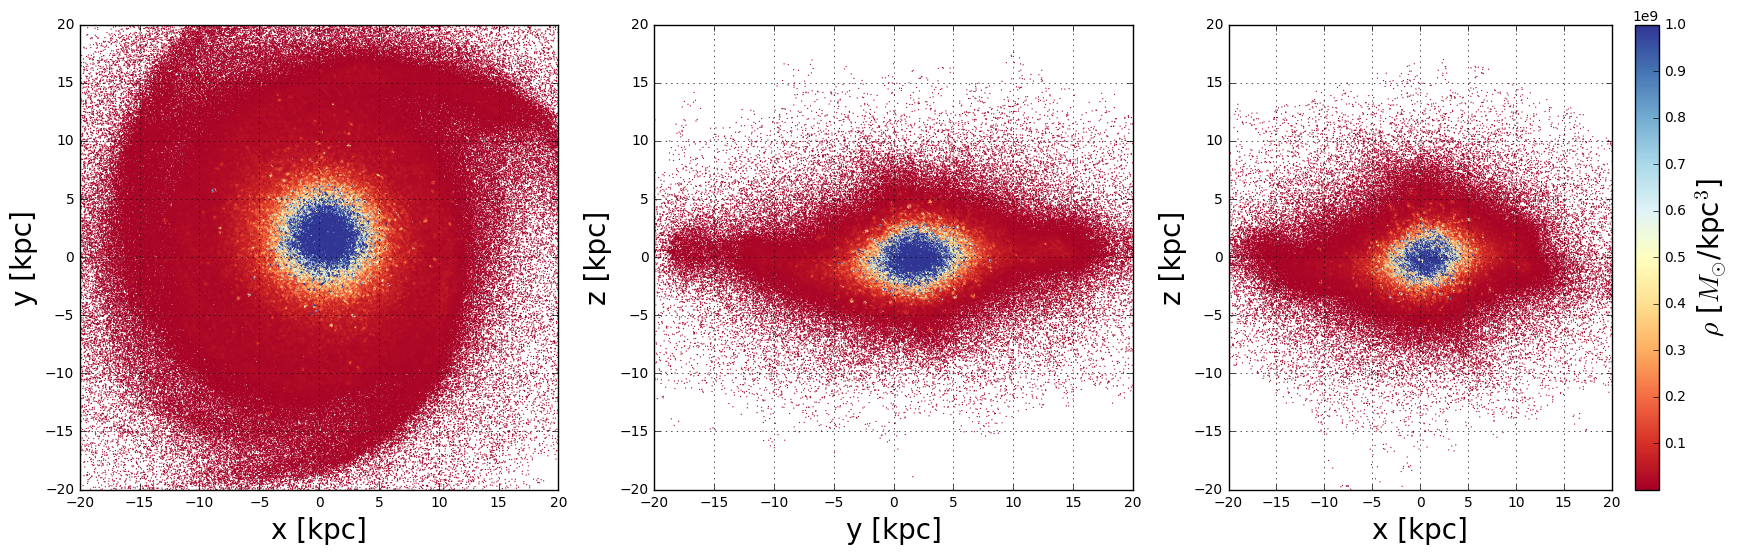

In [41]:
r_search=20.
fig, [ax,ax3,ax2] = plt.subplots(1,3,figsize=[21,6])
ax.set_xlim([center[0]-r_search, center[0]+r_search])
ax.set_ylim([center[1]-r_search, center[1]+r_search])
ax3.set_ylim([center[1]-r_search, center[1]+r_search])
ax3.set_xlim([center[2]-r_search, center[2]+r_search])

ax2.set_xlim([center[0]-r_search, center[0]+r_search])
ax2.set_ylim([center[2]-r_search, center[2]+r_search])

cm = plt.cm.get_cmap('RdYlBu')
ax.grid(which='both')
ax2.grid(which='both')
ax3.grid(which='both')
ax.set_xlabel("x [kpc]",fontsize=20)
ax2.set_xlabel("x [kpc]",fontsize=20)
ax3.set_xlabel("y [kpc]",fontsize=20)
ax.set_ylabel("y [kpc]",fontsize=20)
ax2.set_ylabel("z [kpc]",fontsize=20)
ax3.set_ylabel("z [kpc]",fontsize=20)

ax.scatter(nurot[:,0], nurot[:,1], c=nu_rho, cmap=cm,vmin=1e4, vmax=1e9,lw=0, s=0.8)#nu_rho)
ax3.scatter(nurot3[:,1], nurot3[:,2], c=nu_rho3, cmap=cm,vmin=1e4, vmax=1e9,lw=0, s=0.8)#nu_rho)
coco =ax2.scatter(nurot2[:,0], nurot2[:,2], c=nu_rho2, cmap=cm,vmin=1e4, vmax=1e9,lw=0, s=0.8)
cbar = plt.colorbar(coco)#,orientation='horizontal')
cbar.set_label(r'$\rho$ [$M_{\odot}$/kpc$^3$]',fontsize=20)
#ax.scatter(rot[:,0],pos_halo[:,1],s=0.01)
#ax.scatter(list_pos[:,0],list_pos[:,1],s=1.1, c='r',lw=0)

In [128]:
print len(rot)
print len((rot[:,0]==0.))
num = 2e-2
print len(rot[(abs(rot[:,0])<num)&(abs(rot[:,1])<num)&(abs(rot[:,2])<num)])
print rot[(abs(rot[:,0])<num)&(abs(rot[:,1])<num)&(abs(rot[:,2])<num)]

print pos_out[(abs(rot[:,0])<1e-5)&(abs(rot[:,1])<1e-5)&(abs(rot[:,2])<1e-5)]
print np.float32(-1.58694514e-08)

6388598
6388598
2
[[ -1.58694514e-08  -1.05714079e-08  -6.83095045e-10]
 [ -6.49332621e-03   1.93623217e-02  -7.60702500e-03]]
[ 5.74693727]
-1.58695e-08


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19165794 but corresponding boolean dimension is 6388598


In [103]:
outfile="mysnap.g2"     # output filename
type="gadget2"             # we choose to save file in gadget2 format
unsout=CunsOut(outfile,type)  # instantiate output object


In [108]:
pos_out = rot.reshape(len(rot)*3) 
pos_out = pos_out.astype(np.float32, copy=False)
mass_out = m_in_halo / p.simutoMsun
#rho_out = rho *  [p.simutokpc**3] / p.simutoMsun
mass_out = mass_out.astype(np.float32, copy=False)
pos_out


array([  51.14375305,   41.30528641,   42.46226883, ..., -173.23141479,
         80.63663483,  155.73777771], dtype=float32)

In [109]:
comp = "stars"
ok=unsout.setArrayF(comp,"pos",pos_out)
print ok
ok=unsout.setArrayF(comp,"mass",mass_out)
print ok
#ok=unsout.setArrayF(comp,"rho",rho_out)
#print ok

1
1


In [106]:
unsout.save()

1

In [31]:
D = np.dot(inv,np.dot(P,eigen_vectors))
per = np.array([[0,1,0],[1,0,0],[0,0,1]])
perinv = np.linalg.inv(per)
print D
print "\n"
print np.dot(perinv,np.dot(D,per))


[[ -2.77229978e+02   1.13686838e-13  -1.42108547e-14]
 [ -4.26325641e-14   3.03672589e+01   1.77635684e-14]
 [  2.84217094e-14   2.66453526e-14   5.68627192e+01]]


[[  3.03672589e+01  -4.26325641e-14   1.77635684e-14]
 [  1.13686838e-13  -2.77229978e+02  -1.42108547e-14]
 [  2.66453526e-14   2.84217094e-14   5.68627192e+01]]


In [ ]:
print eigen_values[order],order

In [ ]:
kroneker = np.array([[1,0,0],[0,1,0],[0,0,1]])
print kroneker


In [ ]:
kroneker = np.array([[1,0,0],[0,1,0],[0,0,1]])
print kroneker
Per = np.array([[1,0,0],[0,1,0],[0,0,1]])
Per2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
print kroneker
if order[2]==0:
    if order[1]==1:
        T=eigen_vectors
    else:
        print kroneker
        Per[:,1] = kroneker[:,2]
        print kroneker
        Per[:,2] = kroneker[:,1]
        print kroneker
    T=np.dot(eigen_vectors,Per)
elif order[2]==1:
    Per[:,0]=kroneker[:,1]
    Per[:,1]=kroneker[:,0]
    if order[1]==2:
        Per2[:,1]=kroneker[:,2]
        Per2[:,2]=kroneker[:,1]
    T=np.dot(np.dot(eigen_vectors,Per),Per2)
elif order[2]==2:
    Per[:,0]=kroneker[:,2]
    Per[:,2]=kroneker[:,0]
    if order[1]==0:
        Per2[:,1]=kroneker[:,2]
        Per2[:,2]=kroneker[:,1]      
    T=np.dot(np.dot(eigen_vectors,Per),Per2)

print "coco\n\n",kroneker
print "\n"
print order    
print T
print "\n"
print eigen_vectors
print "\n"
print Per
Tinv = np.linalg.inv(T)
Perinv = np.linalg.inv(Per)
Per2inv = np.linalg.inv(Per2)

print np.dot(Tinv,np.dot(P,T))
print np.dot(P,T[:,1])/5.68627192e+01
        
    
    
    

In [ ]:
to = np.dot(Perinv,T)
print to